In [1]:
#imports
import pandas as pd

# Data processing

Load csv files

In [2]:
df_prostate = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/prostate.csv')
df_renal = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/renal.csv')
df_throat = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/throat.csv')
df_normal = pd.read_csv('/Users/ledamduyen/Desktop/CS 539/project/dataset/clean/normal.csv')

Combine normal and cancer entries, have an equal number of cancer and normal

In [3]:
def create_combined_df(cancer_df, normal_df, random_state):
    cancer_count = len(cancer_df)
    #sample until we get an equal number of normal entries (might need to do sampling with replacement depending on the count)
    normal_sample = normal_df.sample(n=cancer_count, random_state=random_state, replace=False)

    #combine the dataframes
    combined_df = pd.concat([cancer_df, normal_sample], ignore_index=True)
    return combined_df


In [4]:
#create combined dataframes
df_prostate_cancer = create_combined_df(df_prostate, df_normal, 10)
df_renal_cancer = create_combined_df(df_renal, df_normal, 11)
df_throat_cancer = create_combined_df(df_throat, df_normal, 12)

In [5]:
# Preprocessing data
# Input df, return X,y for training
from sklearn.utils import shuffle

def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert 'cancer_type' column to binary type: normal = 0, other = 1
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'normal': 0}).fillna(1).astype(int)
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y

# Display proccesed data

X_p,y_p = preprocessing(df_prostate_cancer)
X_r,y_r = preprocessing(df_renal_cancer)
X_t,y_t = preprocessing(df_throat_cancer)

display(X_r,y_r)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,9.176833,8.096554,7.273344,8.181626,2.499844,7.881215,5.276175,4.867742,10.289692,3.285293,...,11.181759,10.762042,12.961899,12.688069,3.725097,3.438851,2.985189,2.687256,3.182581,3.151897
1,10.398563,7.705136,5.539738,9.639625,2.606360,7.527843,5.515707,5.380585,8.251765,3.226581,...,11.278896,10.922836,13.101919,12.879850,3.575279,3.394276,2.951872,2.595775,3.004451,3.046263
2,10.391154,7.844691,6.859150,9.706051,2.832692,8.091542,5.529405,5.072060,10.077566,3.227613,...,11.186446,10.775110,12.952916,12.706673,3.756748,3.593477,3.179602,2.670777,3.067572,3.205570
3,10.735776,8.011649,5.898992,9.988369,2.947561,7.219124,5.617897,5.050528,6.401838,3.129943,...,11.114506,10.843346,13.076192,12.767658,3.747672,3.292814,2.999690,2.707248,3.185152,3.118335
4,9.435494,8.015729,6.849532,8.852354,2.504070,7.337607,5.017304,5.118793,6.924959,3.555628,...,11.049942,10.619544,12.897566,12.632525,3.824783,3.472515,2.928189,2.604355,3.118041,3.041668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11.532318,8.295377,8.032560,9.287000,5.237196,8.544502,6.221281,6.446083,7.601814,5.597363,...,13.002976,12.574812,14.100213,13.910309,5.495707,5.550453,4.587382,4.348775,4.871972,4.730194
154,10.601131,6.426123,5.493845,7.712389,3.569760,7.993786,5.969634,4.660047,7.245230,3.763940,...,13.509037,13.119966,14.622678,14.482744,8.804711,4.897431,6.028813,2.748260,3.739844,3.184603
155,10.456393,6.492040,6.147456,7.867307,3.705554,7.129797,5.843678,5.287788,5.400974,3.867667,...,12.011763,11.424249,13.652698,13.495931,4.033132,3.697196,3.484437,3.505660,3.900688,3.830304
156,9.736553,6.085462,5.575046,10.184738,2.502134,7.013732,5.174297,4.270660,6.164104,5.851820,...,12.588995,11.769854,13.926275,13.862556,10.171430,7.839900,9.014192,2.289525,2.987165,2.875362


0      1
1      1
2      1
3      1
4      1
      ..
153    0
154    0
155    0
156    0
157    0
Name: cancer_type, Length: 158, dtype: int64

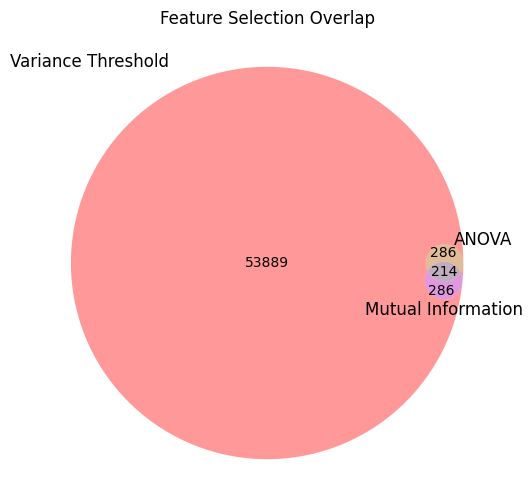

{'Variance Threshold': {'206698_at',
  '214135_at',
  '234399_at',
  '226533_at',
  '203771_s_at',
  '209028_s_at',
  '1554831_x_at',
  '202912_at',
  '226459_at',
  '1554941_at',
  '208271_at',
  '203352_at',
  '209759_s_at',
  '222950_at',
  '203527_s_at',
  '226194_at',
  '208987_s_at',
  '227803_at',
  '206089_at',
  '238356_at',
  '229741_at',
  '236245_at',
  '1558688_at',
  '234054_at',
  '242642_at',
  '237525_at',
  '224478_s_at',
  '211208_s_at',
  '234003_at',
  '214609_at',
  '220000_at',
  '237092_at',
  '208745_at',
  '228659_at',
  '210356_x_at',
  '231647_s_at',
  '244586_x_at',
  '1554067_at',
  '227276_at',
  '1553078_at',
  '207648_at',
  '201859_at',
  '233751_at',
  '225492_at',
  '228626_at',
  '204965_at',
  '220668_s_at',
  '223066_at',
  '220003_at',
  '206339_at',
  '243335_at',
  '1570222_at',
  '202796_at',
  '207963_at',
  '236554_x_at',
  '213439_x_at',
  '215512_at',
  '201364_s_at',
  '204738_s_at',
  '224833_at',
  '218471_s_at',
  '230391_at',
  '22755

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif

def feature_selection_with_venn(X, y, variance_threshold=0.001, k_anova=500, k_mutual=500):
    
    # Method 1: Variance Threshold
    selector = VarianceThreshold(threshold=variance_threshold)
    selector.fit(X)
    variance_features = set(X.columns[selector.get_support(indices=True)])

    # Method 2: ANOVA F-statistic
    anova_selector = SelectKBest(score_func=f_classif, k=k_anova)
    anova_selector.fit(X, y)
    anova_features = set(X.columns[anova_selector.get_support(indices=True)])

    # Method 3: Mutual Information
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k_mutual)
    mutual_info_selector.fit(X, y)
    mutual_info_features = set(X.columns[mutual_info_selector.get_support(indices=True)])

    # Visualize overlap with Venn diagram
    plt.figure(figsize=(8, 6))
    venn_diagram = venn3(
        subsets=(
            len(variance_features - anova_features - mutual_info_features),  # Only Variance
            len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
            len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
            len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
            len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
            len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
            len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
        ),
        set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
    )
    plt.title("Feature Selection Overlap")
    plt.show()

    # Return selected features
    return {
        "Variance Threshold": variance_features,
        "ANOVA": anova_features,
        "Mutual Information": mutual_info_features
    }

feature_selection_with_venn(X_p, y_p, variance_threshold=0.001, k_anova=500, k_mutual=500)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt

def analyze_feature_overlap(X, y, k_values):
    
    overlap_results = {}

    overlap_rates = []  # Store overlap rates for each k
    for k in k_values:
        # Select features using ANOVA
        anova_selector = SelectKBest(score_func=f_classif, k=k)
        anova_features = set(X.columns[anova_selector.fit(X, y).get_support()])

        # Select features using Mutual Information
        mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k)
        mutual_info_features = set(X.columns[mutual_info_selector.fit(X, y).get_support()])

        # Calculate overlap details
        intersection = anova_features & mutual_info_features
        union = anova_features | mutual_info_features
        overlap_rate = len(intersection) / len(union) if union else 0

        # Store results
        overlap_results[k] = {
            "anova_features": anova_features,
            "mutual_info_features": mutual_info_features,
            "overlap_features": intersection,
            "overlap_rate": overlap_rate
        }

        overlap_rates.append(overlap_rate)

    # Plot overlap rates
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, overlap_rates, marker="o", linestyle="-", label="Overlap Rate")
    plt.title("Overlap Rate Between ANOVA and Mutual Information Features")
    plt.xlabel("Number of Selected Features (k)")
    plt.ylabel("Overlap Rate")
    plt.grid(True)
    plt.legend()
    plt.show()

    return overlap_results

k_p_values = [100, 300, 500, 1000, 2500]
overlap_results = analyze_feature_overlap(X_p, y_p, k_p_values)

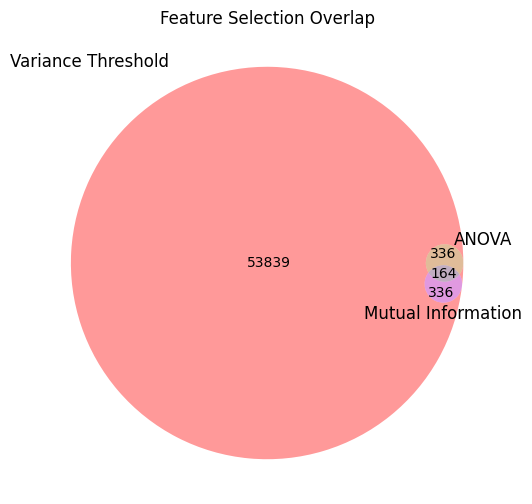

{'Variance Threshold': {'203521_s_at',
  '220234_at',
  '1552743_at',
  '204650_s_at',
  '235225_at',
  '240979_at',
  '231219_at',
  '228199_at',
  '224057_s_at',
  '230654_at',
  '215774_s_at',
  '228874_at',
  '208084_at',
  '236946_at',
  '221744_at',
  '216944_s_at',
  '210381_s_at',
  '217795_s_at',
  '241317_at',
  '210631_at',
  '221549_at',
  '203369_x_at',
  '232808_at',
  '201136_at',
  '1555320_a_at',
  '228890_at',
  '201143_s_at',
  '1567249_at',
  '216956_s_at',
  '227092_at',
  '203956_at',
  '227281_at',
  '1557432_at',
  '220394_at',
  '229851_s_at',
  '1555051_at',
  '242066_at',
  '214712_at',
  '1561386_at',
  '214875_x_at',
  '220696_at',
  '209611_s_at',
  '208796_s_at',
  '223632_s_at',
  '237989_at',
  '1560638_a_at',
  '205550_s_at',
  '205952_at',
  '210917_at',
  '244670_at',
  '215997_s_at',
  '217227_x_at',
  '239019_at',
  '212318_at',
  '208793_x_at',
  '212894_at',
  '239415_at',
  '225567_at',
  '204038_s_at',
  '229078_s_at',
  '223695_s_at',
  '20200

In [ ]:
feature_selection_with_venn(X_r, y_r, variance_threshold=0.001, k_anova=500, k_mutual=500)

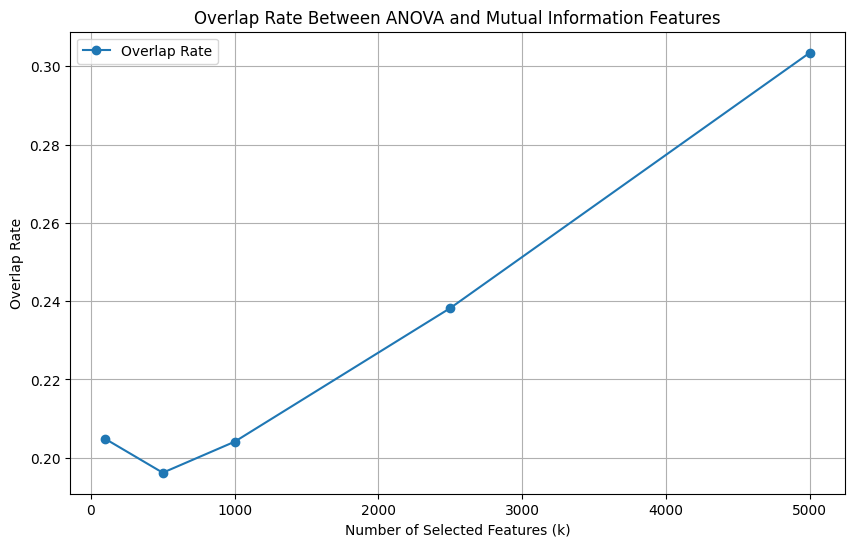

In [ ]:
k_r_values = [100, 500, 1000, 2500, 5000]
overlap_results = analyze_feature_overlap(X_r, y_r, k_r_values)

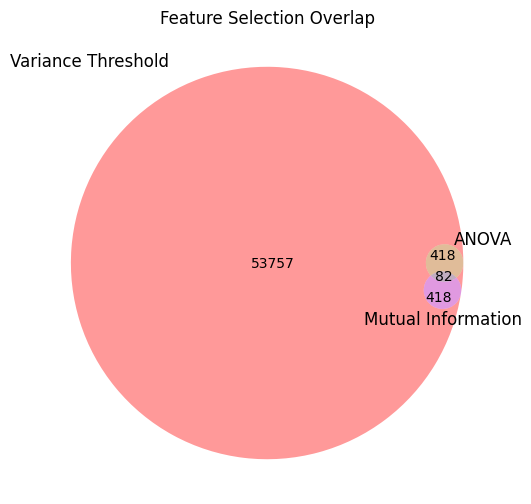

{'Variance Threshold': {'203521_s_at',
  '220234_at',
  '1552743_at',
  '204650_s_at',
  '235225_at',
  '240979_at',
  '231219_at',
  '228199_at',
  '224057_s_at',
  '230654_at',
  '215774_s_at',
  '228874_at',
  '208084_at',
  '236946_at',
  '221744_at',
  '216944_s_at',
  '210381_s_at',
  '217795_s_at',
  '241317_at',
  '210631_at',
  '221549_at',
  '203369_x_at',
  '232808_at',
  '201136_at',
  '1555320_a_at',
  '228890_at',
  '201143_s_at',
  '1567249_at',
  '216956_s_at',
  '227092_at',
  '203956_at',
  '227281_at',
  '1557432_at',
  '220394_at',
  '229851_s_at',
  '1555051_at',
  '242066_at',
  '214712_at',
  '1561386_at',
  '214875_x_at',
  '220696_at',
  '209611_s_at',
  '208796_s_at',
  '223632_s_at',
  '237989_at',
  '1560638_a_at',
  '205550_s_at',
  '205952_at',
  '210917_at',
  '244670_at',
  '215997_s_at',
  '217227_x_at',
  '239019_at',
  '212318_at',
  '208793_x_at',
  '212894_at',
  '239415_at',
  '225567_at',
  '204038_s_at',
  '229078_s_at',
  '223695_s_at',
  '20200

In [ ]:
feature_selection_with_venn(X_t, y_t, variance_threshold=0.001, k_anova=500, k_mutual=500)

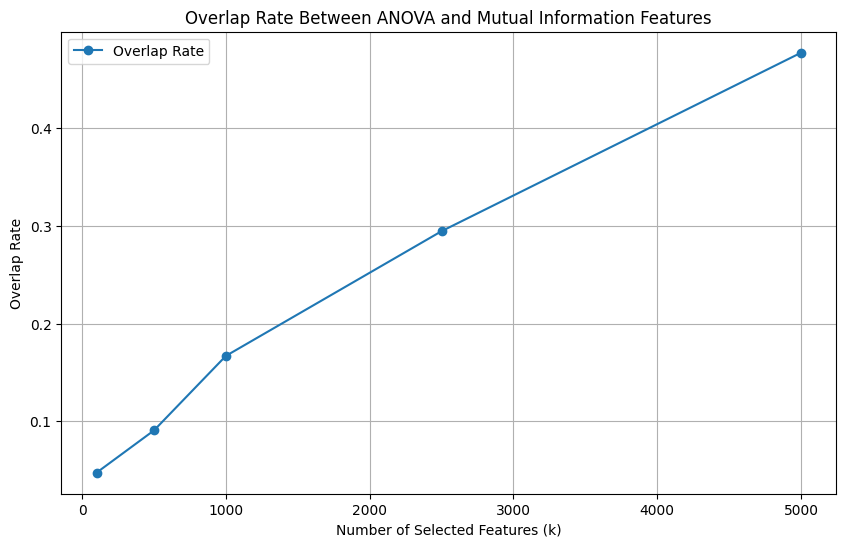

In [ ]:
k_t_values = [100, 500, 1000, 2500, 5000]
overlap_results = analyze_feature_overlap(X_t, y_t, k_t_values)

In [ ]:
def feature_selection(X, y, k_anova=500, k_mutual=500, combine_features=True):
    
    # Perform ANOVA feature selection
    anova_selector = SelectKBest(score_func=f_classif, k=k_anova)
    anova_selector.fit(X, y)
    X_anova = set(X.columns[anova_selector.get_support()])

    # Perform Mutual Information feature selection
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=k_mutual)
    mutual_info_selector.fit(X, y)
    X_mut = set(X.columns[mutual_info_selector.get_support()])

    # Combine or reduce overlap between features
    if combine_features:
        selected_features = X_anova.union(X_mut)  # Combine features (union)
    else:
        selected_features = X_anova.intersection(X_mut)  # Reduce overlap (intersection)

    # Subset data with selected features
    X_reduce = X[list(selected_features)]
    return X_reduce

X_p = feature_selection(X_p, y_p, k_anova=300, k_mutual=300, combine_features=True)
X_r = feature_selection(X_r, y_r, k_anova=300, k_mutual=300, combine_features=True)
X_t = feature_selection(X_t, y_t, k_anova=1000, k_mutual=1000, combine_features=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=300 is greater than n_features=166. All the features will be returned.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=300 is greater than n_features=166. All the features will be returned.
  warnings.warn(


# Classification models for each cancer type

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

# Function for logistic regression using 5-fold cross-validation
def logistic_regression_kfold(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    recalls = []

    for train_index, test_index in kf.split(X):
        # Use iloc for integer-based indexing with Pandas
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate accuracy and recall for the fold
        accuracies.append(accuracy_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred, zero_division=0))

    # Calculate mean accuracy and recall across folds
    mean_accuracy = round(sum(accuracies) / len(accuracies), 2)
    mean_recall = round(sum(recalls) / len(recalls), 2)

    # Return results
    return {
        "accuracy_per_fold": accuracies,
        "recall_per_fold": recalls,
        "mean_accuracy": mean_accuracy,
        "mean_recall": mean_recall
    }


In [ ]:
results = logistic_regression_kfold(X_p, y_p, n_splits=5)
print("Mean Accuracy:", results["mean_accuracy"])
print("Mean Recall:", results["mean_recall"])

Mean Accuracy: 0.98
Mean Recall: 1.0


In [ ]:
results = logistic_regression_kfold(X_r, y_r, n_splits=5)
print("Mean Accuracy:", results["mean_accuracy"])
print("Mean Recall:", results["mean_recall"])

Mean Accuracy: 0.94
Mean Recall: 0.95


In [ ]:
results = logistic_regression_kfold(X_t, y_t, n_splits=5)
print("Mean Accuracy:", results["mean_accuracy"])
print("Mean Recall:", results["mean_recall"])

Mean Accuracy: 0.98
Mean Recall: 1.0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

# Function for Random Forest with 5-Fold Cross-Validation
def random_forest_kfold(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    recalls = []

    for train_index, test_index in kf.split(X):
        # Use .iloc for positional indexing if X and y are Pandas objects
        if isinstance(X, np.ndarray):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
        else:  # Assume X and y are Pandas objects
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Random Forest model
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        # Predict and calculate metrics
        y_pred = model.predict(X_test)
        accuracies.append(round(accuracy_score(y_test, y_pred), 2))
        recalls.append(round(recall_score(y_test, y_pred, zero_division=0), 2))

    # Calculate mean accuracy and recall across folds
    mean_accuracy = round(np.mean(accuracies), 2)
    mean_recall = round(np.mean(recalls), 2)

    # Return results
    return {
        "accuracy_per_fold": accuracies,
        "recall_per_fold": recalls,
        "mean_accuracy": mean_accuracy,
        "mean_recall": mean_recall
    }


In [ ]:
results = random_forest_kfold(X_p, y_p, n_splits=5)
print("Mean Accuracy:", results["mean_accuracy"])
print("Mean Recall:", results["mean_recall"])

Mean Accuracy: 0.98
Mean Recall: 1.0


In [ ]:
results = random_forest_kfold(X_r, y_r, n_splits=5)
print("Mean Accuracy:", results["mean_accuracy"])
print("Mean Recall:", results["mean_recall"])

Mean Accuracy: 0.94
Mean Recall: 0.93


In [ ]:
results = random_forest_kfold(X_t, y_t, n_splits=5)
print("Mean Accuracy:", results["mean_accuracy"])
print("Mean Recall:", results["mean_recall"])

Mean Accuracy: 0.98
Mean Recall: 1.0


Run the cancer type classification models

# Classification models for specific cancer subtype

In [ ]:
# Decision tree function 
def decision_tree(X_train, y_train, X_val, y_val):
    # apply PCA 
    pca = PCA(n_components=0.95)
    X_train_PCA = pca.fit_transform(X_train)
    X_val_PCA = pca.transform(X_val)

    # train model
    model = DecisionTreeClassifier()
    model.fit(X_train_PCA, y_train)
    y_pred = model.predict(X_val_PCA)

    # evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')  #use weighted in case of multi class classification
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    return y_pred, accuracy, precision, recall, f1


In [ ]:
#Naive Bayes
def naive_bayes(X_train, y_train, X_val, y_val):
  #apply PCA 
  pca = PCA(n_components=0.95)
  X_train_PCA = pca.fit_transform(X_train)
  X_val_PCA = pca.transform(X_val)

  # train the model
  model= GaussianNB()
  model.fit(X_train_PCA, y_train)
  y_pred = model.predict(X_val_PCA)

  # evaluate the model
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')
  return y_pred, accuracy, precision, recall, f1


In [ ]:
#KNN
def knn(X_train, y_train, X_val, y_val):
  # apply PCA 
  pca = PCA(n_components=0.95)
  X_train_PCA = pca.fit_transform(X_train)
  X_val_PCA = pca.transform(X_val)

  # train the model
  model= KNeighborsClassifier()
  model.fit(X_train_PCA, y_train)
  y_pred = model.predict(X_val_PCA)

  # evaluate the model
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')
  return y_pred, accuracy, precision, recall, f1


In [ ]:
# Logistic Regression
def logistic_regression_subtype(X_train, y_train, X_val, y_val):
  # apply PCA 
  pca = PCA(n_components=0.95)
  X_train_PCA = pca.fit_transform(X_train)
  X_val_PCA = pca.transform(X_val)

  # run the model
  model= LogisticRegression()
  model.fit(X_train_PCA, y_train)
  y_pred = model.predict(X_val_PCA)

  # evaluate the model
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')
  return y_pred, accuracy, precision, recall, f1


In [ ]:
# Random Forest
def random_forest_subtype(X_train, y_train, X_val, y_val):
  # apply PCA 
  pca = PCA(n_components=0.95)
  X_train_PCA = pca.fit_transform(X_train)
  X_val_PCA = pca.transform(X_val)

  # train the model
  model= RandomForestClassifier()
  model.fit(X_train_PCA, y_train)
  y_pred = model.predict(X_val_PCA)

  # evaluate the model
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')
  return y_pred, accuracy, precision, recall, f1


In [ ]:
# SVM
def svm(X_train, y_train, X_val, y_val):
  # apply PCA 
  pca = PCA(n_components=0.95)
  X_train_PCA = pca.fit_transform(X_train)
  X_val_PCA = pca.transform(X_val)

  # train the model
  model= LinearSVC()
  model.fit(X_train_PCA, y_train)
  y_pred = model.predict(X_val_PCA)

  # evaluate the model
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')
  return y_pred, accuracy, precision, recall, f1


Run the cancer subtype classification models

In [ ]:
#function to run all the models and print the metrics
def evaluate_classifier(classifier_function, X_train, y_train, X_val, y_val, classifier_name):
    #prints the metrics and returns them for further use
    
    # run the classifier
    y_pred, accuracy, precision, recall, f1 = classifier_function(X_train, y_train, X_val, y_val)

    # print results
    print(f"Results for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

    # return metrics for further use
    return {
        "y_pred": y_pred,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }



In [ ]:
#run on prostate
results_decision_tree = evaluate_classifier(
    decision_tree,
    X_train_prostate_subtype, y_train_prostate_subtype,
    X_val_prostate_subtype, y_val_prostate_subtype,
    "Decision Tree"
)

results_naive_bayes = evaluate_classifier(
    naive_bayes,
    X_train_prostate_subtype, y_train_prostate_subtype,
    X_val_prostate_subtype, y_val_prostate_subtype,
    "Naive Bayes"
)

results_KNN = evaluate_classifier(
    knn,
    X_train_prostate_subtype, y_train_prostate_subtype,
    X_val_prostate_subtype, y_val_prostate_subtype,
    "KNN"
)

results_logistic_regression = evaluate_classifier(
    logistic_regression_subtype,
    X_train_prostate_subtype, y_train_prostate_subtype,
     X_val_prostate_subtype, y_val_prostate_subtype,
    "Logistic Regression"
)

results_random_forest = evaluate_classifier(
    random_forest_subtype,
    X_train_prostate_subtype, y_train_prostate_subtype,
    X_val_prostate_subtype, y_val_prostate_subtype,
    "Random Forest"

)

results_SVM = evaluate_classifier(
    svm,
    X_train_prostate_subtype, y_train_prostate_subtype,
    X_val_prostate_subtype, y_val_prostate_subtype,
    "SVM"
)

"""
Results for Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Results for Naive Bayes:
Accuracy: 0.8421
Precision: 0.8895
Recall: 0.8421
F1 Score: 0.8448


Results for KNN:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Results for Logistic Regression:
Accuracy: 0.9474
Precision: 0.9539
Recall: 0.9474
F1 Score: 0.9480


Results for Random Forest:
Accuracy: 0.9474
Precision: 0.9539
Recall: 0.9474
F1 Score: 0.9480


Results for SVM:
Accuracy: 0.9474
Precision: 0.9539
Recall: 0.9474
F1 Score: 0.9480

"""


Results for Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Results for Naive Bayes:
Accuracy: 0.8421
Precision: 0.8895
Recall: 0.8421
F1 Score: 0.8448


Results for KNN:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Results for Logistic Regression:
Accuracy: 0.9474
Precision: 0.9539
Recall: 0.9474
F1 Score: 0.9480


Results for Random Forest:
Accuracy: 0.9474
Precision: 0.9539
Recall: 0.9474
F1 Score: 0.9480


Results for SVM:
Accuracy: 0.9474
Precision: 0.9539
Recall: 0.9474
F1 Score: 0.9480




'\nResults for Decision Tree:\nAccuracy: 1.0000\nPrecision: 1.0000\nRecall: 1.0000\nF1 Score: 1.0000\n\n\nResults for Naive Bayes:\nAccuracy: 0.8421\nPrecision: 0.8895\nRecall: 0.8421\nF1 Score: 0.8448\n\n\nResults for KNN:\nAccuracy: 1.0000\nPrecision: 1.0000\nRecall: 1.0000\nF1 Score: 1.0000\n\n\nResults for Logistic Regression:\nAccuracy: 0.9474\nPrecision: 0.9539\nRecall: 0.9474\nF1 Score: 0.9480\n\n\nResults for Random Forest:\nAccuracy: 0.9474\nPrecision: 0.9539\nRecall: 0.9474\nF1 Score: 0.9480\n\n\nResults for SVM:\nAccuracy: 0.9474\nPrecision: 0.9539\nRecall: 0.9474\nF1 Score: 0.9480\n\n'

In [ ]:
#run on renal
results_decision_tree = evaluate_classifier(
    decision_tree,
    X_train_renal_subtype, y_train_renal_subtype,
    X_val_renal_subtype, y_val_renal_subtype,
    "Decision Tree"
)

results_naive_bayes = evaluate_classifier(
    naive_bayes,
    X_train_renal_subtype, y_train_renal_subtype,
    X_val_renal_subtype, y_val_renal_subtype,
    "Naive Bayes"
)

results_KNN = evaluate_classifier(
    knn,
    X_train_renal_subtype, y_train_renal_subtype,
    X_val_renal_subtype, y_val_renal_subtype,
    "KNN"
)

results_logistic_regression = evaluate_classifier(
    logistic_regression_subtype,
    X_train_renal_subtype, y_train_renal_subtype,
    X_val_renal_subtype, y_val_renal_subtype,
    "Logistic Regression"
)

results_random_forest = evaluate_classifier(
    random_forest_subtype,
    X_train_renal_subtype, y_train_renal_subtype,
    X_val_renal_subtype, y_val_renal_subtype,
    "Random Forest"
)

results_SVM = evaluate_classifier(
    svm,
    X_train_renal_subtype, y_train_renal_subtype,
    X_val_renal_subtype, y_val_renal_subtype,
    "SVM"
)

"""
Results for Decision Tree:
Accuracy: 0.9688
Precision: 0.9705
Recall: 0.9688
F1 Score: 0.9687


Results for Naive Bayes:
Accuracy: 0.9062
Precision: 0.9219
Recall: 0.9062
F1 Score: 0.9060


Results for KNN:
Accuracy: 0.9688
Precision: 0.9707
Recall: 0.9688
F1 Score: 0.9688


Results for Logistic Regression:
Accuracy: 0.9375
Precision: 0.9449
Recall: 0.9375
F1 Score: 0.9375


Results for Random Forest:
Accuracy: 0.9375
Precision: 0.9375
Recall: 0.9375
F1 Score: 0.9375


Results for SVM:
Accuracy: 0.9375
Precision: 0.9449
Recall: 0.9375
F1 Score: 0.9375

"""

Results for Decision Tree:
Accuracy: 0.9688
Precision: 0.9705
Recall: 0.9688
F1 Score: 0.9687


Results for Naive Bayes:
Accuracy: 0.9062
Precision: 0.9219
Recall: 0.9062
F1 Score: 0.9060


Results for KNN:
Accuracy: 0.9688
Precision: 0.9707
Recall: 0.9688
F1 Score: 0.9688


Results for Logistic Regression:
Accuracy: 0.9375
Precision: 0.9449
Recall: 0.9375
F1 Score: 0.9375


Results for Random Forest:
Accuracy: 0.9375
Precision: 0.9375
Recall: 0.9375
F1 Score: 0.9375


Results for SVM:
Accuracy: 0.9375
Precision: 0.9449
Recall: 0.9375
F1 Score: 0.9375




'\nResults for Decision Tree:\nAccuracy: 0.9375\nPrecision: 0.9375\nRecall: 0.9375\nF1 Score: 0.9375\n\n\nResults for Naive Bayes:\nAccuracy: 0.9062\nPrecision: 0.9219\nRecall: 0.9062\nF1 Score: 0.9060\n\n\nResults for KNN:\nAccuracy: 0.9688\nPrecision: 0.9707\nRecall: 0.9688\nF1 Score: 0.9688\n\n\nResults for Logistic Regression:\nAccuracy: 0.9375\nPrecision: 0.9449\nRecall: 0.9375\nF1 Score: 0.9375\n\n\nResults for Random Forest:\nAccuracy: 0.9688\nPrecision: 0.9707\nRecall: 0.9688\nF1 Score: 0.9688\n\n\nResults for SVM:\nAccuracy: 0.9375\nPrecision: 0.9449\nRecall: 0.9375\nF1 Score: 0.9375\n\n'

In [ ]:
#run on throat
results_decision_tree = evaluate_classifier(
    decision_tree,
    X_train_throat_subtype, y_train_throat_subtype,
    X_val_throat_subtype, y_val_throat_subtype,
    "Decision Tree"
)

results_naive_bayes = evaluate_classifier(
    naive_bayes,
    X_train_throat_subtype, y_train_throat_subtype,
    X_val_throat_subtype, y_val_throat_subtype,
    "Naive Bayes"
)

results_KNN = evaluate_classifier(
    knn,
    X_train_throat_subtype, y_train_throat_subtype,
    X_val_throat_subtype,  y_val_throat_subtype,
    "KNN"
)

results_logistic_regression = evaluate_classifier(
    logistic_regression_subtype,
    X_train_throat_subtype, y_train_throat_subtype,
    X_val_throat_subtype,  y_val_throat_subtype,
    "Logistic Regression"
)

results_random_forest = evaluate_classifier(
    random_forest_subtype,
    X_train_throat_subtype, y_train_throat_subtype,
    X_val_throat_subtype,  y_val_throat_subtype,
    "Random Forest"
)

results_SVM = evaluate_classifier(
    svm,
    X_train_throat_subtype, y_train_throat_subtype,
    X_val_throat_subtype,  y_val_throat_subtype,
    "SVM"
)

"""
Results for Decision Tree:
Accuracy: 0.9737
Precision: 0.9749
Recall: 0.9737
F1 Score: 0.9734


Results for Naive Bayes:
Accuracy: 0.9211
Precision: 0.9380
Recall: 0.9211
F1 Score: 0.9226


Results for KNN:
Accuracy: 0.9474
Precision: 0.9555
Recall: 0.9474
F1 Score: 0.9482


Results for Logistic Regression:
Accuracy: 0.9474
Precision: 0.9522
Recall: 0.9474
F1 Score: 0.9460


Results for Random Forest:
Accuracy: 0.9474
Precision: 0.9474
Recall: 0.9474
F1 Score: 0.9474


Results for SVM:
Accuracy: 0.9474
Precision: 0.9522
Recall: 0.9474
F1 Score: 0.9460

"""


Results for Decision Tree:
Accuracy: 0.9737
Precision: 0.9749
Recall: 0.9737
F1 Score: 0.9734


Results for Naive Bayes:
Accuracy: 0.9211
Precision: 0.9380
Recall: 0.9211
F1 Score: 0.9226


Results for KNN:
Accuracy: 0.9474
Precision: 0.9555
Recall: 0.9474
F1 Score: 0.9482


Results for Logistic Regression:
Accuracy: 0.9474
Precision: 0.9522
Recall: 0.9474
F1 Score: 0.9460


Results for Random Forest:
Accuracy: 0.9474
Precision: 0.9474
Recall: 0.9474
F1 Score: 0.9474


Results for SVM:
Accuracy: 0.9474
Precision: 0.9522
Recall: 0.9474
F1 Score: 0.9460




'\nResults for Decision Tree:\nAccuracy: 0.9737\nPrecision: 0.9749\nRecall: 0.9737\nF1 Score: 0.9734\n\n\nResults for Naive Bayes:\nAccuracy: 0.9211\nPrecision: 0.9380\nRecall: 0.9211\nF1 Score: 0.9226\n\n\nResults for KNN:\nAccuracy: 0.9474\nPrecision: 0.9555\nRecall: 0.9474\nF1 Score: 0.9482\n\n\nResults for Logistic Regression:\nAccuracy: 0.9474\nPrecision: 0.9522\nRecall: 0.9474\nF1 Score: 0.9460\n\n\nResults for Random Forest:\nAccuracy: 0.9474\nPrecision: 0.9474\nRecall: 0.9474\nF1 Score: 0.9474\n\n\nResults for SVM:\nAccuracy: 0.9474\nPrecision: 0.9522\nRecall: 0.9474\nF1 Score: 0.9460\n\n\n'